<a href="https://colab.research.google.com/github/olivia2510-ui/Lotto-Winning-Number-Analysis-Recommendation-System/blob/main/%EB%8D%B0%EC%9D%B4%ED%84%B0%EC%B5%9C%EC%A0%81%ED%99%94%EA%B0%9C%EB%A1%A0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tkinter as tk
from ttkthemes import ThemedTk
from tkinter import ttk
from matplotlib import rc
plt.rc("font", family="Malgun Gothic")

In [ ]:
df = pd.read_csv("lotto.csv")

In [ ]:
df.isna().sum()

Round             0
Num1              0
Num2              0
Num3              0
Num4              0
Num5              0
Num6              0
Bonus             0
First-price       0
First-winners     0
Second-price      0
Second-winners    0
dtype: int64

In [ ]:
df.head()

,Round,Num1,Num2,Num3,Num4,Num5,Num6,Bonus,First-price,First-winners,Second-price,Second-winners
0,1146,6,11,17,19,40,43,28,"2,526,476,353",11,"64,331,574",72
1,1145,2,11,31,33,37,44,32,"3,051,630,084",9,"72,657,860",63
2,1144,3,4,12,15,26,34,6,"1,489,347,375",18,"47,532,634",94
3,1143,10,16,17,27,28,36,6,"2,545,657,023",11,"51,855,977",90
4,1142,2,8,28,30,37,41,22,"3,117,517,709",9,"69,795,173",67


In [ ]:
LDN = df.loc[:,["Round","Num1","Num2", "Num3", "Num4", "Num5", "Num6"]]
LDN.index = LDN.index[::-1]
LDN = LDN.sort_index()
LDN

,Round,Num1,Num2,Num3,Num4,Num5,Num6
0,1,10,23,29,33,37,40
1,2,9,13,21,25,32,42
2,3,11,16,19,21,27,31
3,4,14,27,30,31,40,42
4,5,16,24,29,40,41,42
...,...,...,...,...,...,...,...
1141,1142,2,8,28,30,37,41
1142,1143,10,16,17,27,28,36
1143,1144,3,4,12,15,26,34
1144,1145,2,11,31,33,37,44


In [ ]:
LDB = df.loc[:,["Round", "Bonus"]]
LDB.index = LDB.index[::-1]
LDB = LDB.sort_index()
LDB

,Round,Bonus
0,1,16
1,2,2
2,3,30
3,4,2
4,5,3
...,...,...
1141,1142,22
1142,1143,6
1143,1144,6
1144,1145,32


In [ ]:
LDN_T = LDN.loc[:,["Num1","Num2", "Num3", "Num4", "Num5", "Num6"]]
LDB_T = LDB.loc[:,["Bonus"]]

In [ ]:
LDN_TC = LDN_T.apply(pd.Series.value_counts).sum(axis=1).sort_values(ascending=False)
LDN_TC

34    177.0
12    168.0
33    165.0
18    165.0
13    165.0
14    165.0
45    164.0
40    163.0
17    161.0
27    161.0
37    159.0
20    159.0
43    158.0
19    158.0
1     158.0
11    157.0
21    157.0
3     156.0
7     156.0
31    155.0
38    155.0
44    154.0
26    154.0
15    153.0
39    153.0
6     153.0
16    153.0
10    153.0
4     152.0
24    152.0
36    152.0
35    150.0
30    146.0
2     146.0
42    145.0
5     144.0
8     144.0
29    143.0
28    142.0
41    140.0
25    140.0
23    136.0
22    135.0
32    133.0
9     121.0
dtype: float64

In [ ]:
LDB_TC = LDB_T.apply(pd.Series.value_counts).sum(axis=1).sort_values(ascending=False)
LDB_TC

Bonus
43    35
4     34
6     33
2     32
32    32
1     32
30    31
26    31
33    30
17    30
24    30
35    29
27    29
3     29
38    28
7     28
10    27
20    27
12    27
16    27
31    27
13    26
15    25
11    24
36    24
9     24
44    24
39    24
34    23
42    23
28    23
5     23
37    23
8     23
40    22
21    22
14    21
19    20
23    20
18    19
45    18
25    18
41    17
22    17
29    15
dtype: int64

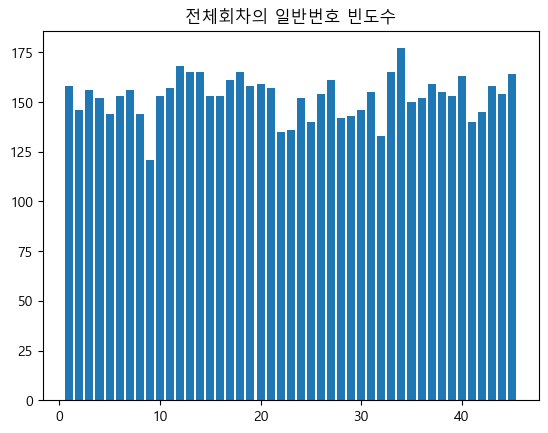

In [ ]:
plt.title("전체회차의 일반번호 빈도수")
plt.bar(LDN_TC.index, LDN_TC.values)
plt.show()

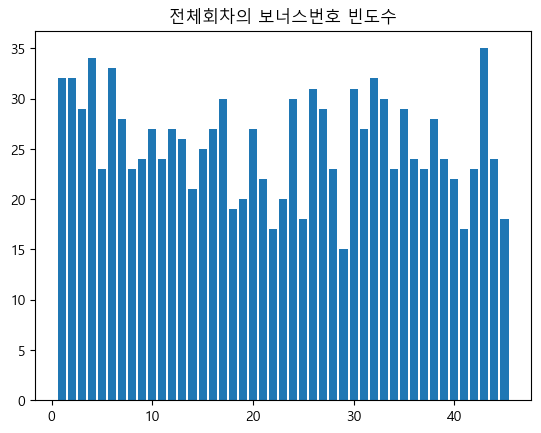

In [ ]:
plt.title("전체회차의 보너스번호 빈도수")
plt.bar(LDB_TC.index, LDB_TC.values)
plt.show()

In [ ]:
#최근 1년간 추이
#52회차로 끊기

LDN_1Y = LDN_T.iloc[-52:]
LDB_1Y = LDB_T.iloc[-52:]

In [ ]:
LDN_1YC = LDN_1Y.apply(pd.Series.value_counts).sum(axis=1).sort_values(ascending=False)
LDN_1YC

33    12.0
34    12.0
19    12.0
30    11.0
40    11.0
13    11.0
16    10.0
28    10.0
6     10.0
12    10.0
37     9.0
38     9.0
21     9.0
31     9.0
14     9.0
7      9.0
3      9.0
11     8.0
44     8.0
15     7.0
20     7.0
10     7.0
26     7.0
29     7.0
1      7.0
17     6.0
41     6.0
35     6.0
43     6.0
36     5.0
24     5.0
9      5.0
4      5.0
45     5.0
32     4.0
2      4.0
8      4.0
42     4.0
5      4.0
27     3.0
25     3.0
22     3.0
23     2.0
39     2.0
dtype: float64

In [ ]:
LDB_1YC = LDB_1Y.apply(pd.Series.value_counts).sum(axis=1).sort_values(ascending=False)
LDB_1YC

Bonus
4     4
8     3
2     3
22    3
3     3
32    3
12    2
6     2
20    2
24    2
15    2
34    2
26    2
28    2
23    2
7     2
33    1
18    1
35    1
1     1
29    1
5     1
27    1
40    1
30    1
41    1
36    1
11    1
45    1
dtype: int64

In [ ]:
#최근 5년간 추이
#220회차로 끊기

LDN_5Y = LDN_T.iloc[-220:]
LDB_5Y = LDB_T.iloc[-220:]

In [ ]:
LDN_5YC = LDN_5Y.apply(pd.Series.value_counts).sum(axis=1).sort_values(ascending=False)
LDN_5YC

35    37.0
12    36.0
33    36.0
6     36.0
30    35.0
13    35.0
45    34.0
14    34.0
3     33.0
21    33.0
7     33.0
16    32.0
37    32.0
38    32.0
29    32.0
44    32.0
15    31.0
40    31.0
11    31.0
22    31.0
34    31.0
36    31.0
18    30.0
19    30.0
20    30.0
31    30.0
1     29.0
26    29.0
24    29.0
4     28.0
41    28.0
28    27.0
10    27.0
9     27.0
17    26.0
23    26.0
32    25.0
2     24.0
27    24.0
42    24.0
39    21.0
43    21.0
25    21.0
8     20.0
5     16.0
dtype: float64

In [ ]:
LDB_5YC = LDB_5Y.apply(pd.Series.value_counts).sum(axis=1).sort_values(ascending=False)
LDB_5YC

Bonus
32    10
15     9
26     9
28     9
5      7
44     7
24     7
7      7
34     7
4      7
36     6
40     6
30     6
2      6
6      6
3      6
10     5
18     5
35     5
39     5
12     5
20     5
1      5
8      5
31     5
17     5
33     5
38     4
37     4
27     4
11     4
42     3
22     3
45     3
23     3
14     3
16     3
41     3
43     3
19     3
9      3
29     2
21     1
25     1
dtype: int64

In [ ]:
LDN_TCL = LDN_TC.index
LDN_TCL = LDN_TCL.tolist()
LDB_TCL = LDB_TC.index
LDB_TCL = LDB_TCL.tolist()
LDN_1YCL = LDN_1YC.index
LDN_1YCL = LDN_1YCL.tolist()
LDB_1YCL = LDB_1YC.index
LDB_1YCL = LDB_1YCL.tolist()
LDN_5YCL = LDN_5YC.index
LDN_5YCL = LDN_5YCL.tolist()
LDB_5YCL = LDB_5YC.index
LDB_5YCL = LDB_5YCL.tolist()

In [ ]:
import random

#올랜덤

a = []
bonus = []

while len(a) < 6:
    b = random.randint(1,45)
    if b not in a:
        a.append(b)

while True:
    b = random.randint(1,45)
    if b not in a:
        bonus.append(b)
        break

print(f"{a} {bonus}")

[35, 10, 42, 16, 44, 23] [22]


In [ ]:
import random

def generate_lotto_number_1():
    main_numbers = []
    bonus_number = []

    while len(main_numbers) < 6:
        number = random.randint(1, 45)
        if number not in main_numbers:
            main_numbers.append(number)

    while True:
        number = random.randint(1, 45)
        if number not in main_numbers:
            bonus_number.append(number)
            break

    return main_numbers, bonus_number

main_numbers, bonus_number = generate_lotto_number_1()
print(f"Main numbers: {main_numbers}, Bonus number: {bonus_number}")

Main numbers: [44, 35, 24, 6, 20, 39], Bonus number: [40]


In [ ]:
#전체회차에서 많이 나온 10개 중 3개 + 랜덤 3개 + 보너스

a = []
bonus = []

while len(a) < 6:
    if len(a) < 3:
        b = random.randint(0,9)
        if LDN_TCL[b] not in a:
            a.append(LDN_TCL[b])
    else:
        b = random.randint(1,45)
        if b not in a:
            a.append(b)

while True:
    b = random.randint(0,9)
    if LDB_TCL[b] not in a:
        bonus.append(LDB_TCL[b])
        break

print(f"{a} {bonus}")

[18, 14, 40, 24, 19, 37] [43]


In [ ]:
import random

def generate_lotto_number_2():
    main_numbers = []
    bonus_number = []

    while len(main_numbers) < 6:
        if len(main_numbers) < 3:
            number = random.randint(0,9)
            if LDN_TCL[number] not in main_numbers:
                main_numbers.append(LDN_TCL[number])
        else:
            number = random.randint(1, 45)
            if number not in main_numbers:
                main_numbers.append(number)

    while True:
        number = random.randint(0,9)
        if LDB_TCL[number] not in main_numbers:
            bonus_number.append(LDB_TCL[number])
            break

    return main_numbers, bonus_number

main_numbers, bonus_number = generate_lotto_number_2()
print(f"Main numbers: {main_numbers}, Bonus number: {bonus_number}")

Main numbers: [14, 17, 40, 43, 3, 7], Bonus number: [32]


In [ ]:
#전체회차에서 적게 나온 10개 중 3개 + 랜덤 3개 + 보너스

a = []
bonus = []

while len(a) < 6:
    if len(a) < 3:
        b = random.randint(-10,-1)
        if LDN_TCL[b] not in a:
            a.append(LDN_TCL[b])
    else:
        b = random.randint(1,45)
        if b not in a:
            a.append(b)

while True:
    b = random.randint(-10,-1)
    if LDB_TCL[b] not in a:
        bonus.append(LDB_TCL[b])
        break

print(f"{a} {bonus}")

[9, 22, 8, 2, 38, 32] [21]


In [ ]:
import random

def generate_lotto_number_3():
    main_numbers = []
    bonus_number = []

    while len(main_numbers) < 6:
        if len(main_numbers) < 3:
            number = random.randint(-10, -1)
            if LDN_TCL[number] not in main_numbers:
                main_numbers.append(LDN_TCL[number])
        else:
            number = random.randint(1, 45)
            if number not in main_numbers:
                main_numbers.append(number)

    while True:
        number = random.randint(-10, -1)
        if LDB_TCL[number] not in main_numbers:
            bonus_number.append(LDB_TCL[number])
            break

    return main_numbers, bonus_number

main_numbers, bonus_number = generate_lotto_number_3()
print(f"Main numbers: {main_numbers}, Bonus number: {bonus_number}")

Main numbers: [41, 28, 8, 38, 20, 42], Bonus number: [23]


In [ ]:
#최근 1년간 많이 나온 수 10개 중 3개 + 랜덤 3개 + 보너스

a = []
bonus = []

while len(a) < 6:
    if len(a) < 3:
        b = random.randint(0,9)
        if LDN_1YCL[b] not in a:
            a.append(LDN_1YCL[b])
    else:
        b = random.randint(1,45)
        if b not in a:
            a.append(b)

while True:
    b = random.randint(0,9)
    if LDB_1YCL[b] not in a:
        bonus.append(LDB_1YCL[b])
        break

print(f"{a} {bonus}")

[28, 30, 40, 39, 42, 23] [2]


In [ ]:
import random

def generate_lotto_number_4():
    main_numbers = []
    bonus_number = []

    while len(main_numbers) < 6:
        if len(main_numbers) < 3:
            number = random.randint(0,9)
            if LDN_1YCL[number] not in main_numbers:
                main_numbers.append(LDN_1YCL[number])
        else:
            number = random.randint(1, 45)
            if number not in main_numbers:
                main_numbers.append(number)

    while True:
        number = random.randint(0,9)
        if LDB_1YCL[number] not in main_numbers:
            bonus_number.append(LDB_1YCL[number])
            break

    return main_numbers, bonus_number

main_numbers, bonus_number = generate_lotto_number_4()
print(f"Main numbers: {main_numbers}, Bonus number: {bonus_number}")

Main numbers: [28, 12, 33, 13, 40, 7], Bonus number: [4]


In [ ]:
#최근 1년간 적게 나온 수 10개 중 3개 + 랜덤 3개 + 보너스

a = []
bonus = []

while len(a) < 6:
    if len(a) < 3:
        b = random.randint(-10,-1)
        if LDN_1YCL[b] not in a:
            a.append(LDN_1YCL[b])
    else:
        b = random.randint(1,45)
        if b not in a:
            a.append(b)

while True:
    b = random.randint(-10,-1)
    if LDB_1YCL[b] not in a:
        bonus.append(LDB_1YCL[b])
        break

print(f"{a} {bonus}")

[8, 27, 32, 18, 26, 39] [36]


In [ ]:
import random

def generate_lotto_number_5():
    main_numbers = []
    bonus_number = []

    while len(main_numbers) < 6:
        if len(main_numbers) < 3:
            number = random.randint(-10, -1)
            if LDN_1YCL[number] not in main_numbers:
                main_numbers.append(LDN_1YCL[number])
        else:
            number = random.randint(1, 45)
            if number not in main_numbers:
                main_numbers.append(number)

    while True:
        number = random.randint(-10, -1)
        if LDB_1YCL[number] not in main_numbers:
            bonus_number.append(LDB_1YCL[number])
            break

    return main_numbers, bonus_number

main_numbers, bonus_number = generate_lotto_number_5()
print(f"Main numbers: {main_numbers}, Bonus number: {bonus_number}")

Main numbers: [25, 2, 23, 34, 27, 10], Bonus number: [5]


In [ ]:
root = tk.Tk()
root.title("로또 번호 추첨 시스템")
root.geometry("400x300")

result_label = tk.Label(root, text="", font=("Helvetica", 14), justify="left", anchor="w")
result_label.grid(row=0, column=0, columnspan=5, padx=10, pady=10)

def draw_numbers():
    functions = [
        generate_lotto_number_1,
        generate_lotto_number_2,
        generate_lotto_number_3,
        generate_lotto_number_4,
        generate_lotto_number_5,
    ]
    results = [func() for func in functions]

    display_text = "\n".join(
        [f"Main: {', '.join(map(str, main))} | Bonus: {bonus}" for main, bonus in results]
    )

    result_label.config(text=display_text)

draw_button = tk.Button(root, text="번호 추첨", command=draw_numbers, font=("Helvetica", 14))
draw_button.grid(row=1, column=0, columnspan=5, pady=20)

root.mainloop()